<a href="https://colab.research.google.com/github/AkashBhardwaj9078/ML-applications/blob/main/incomplete_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("/content/Tweets.csv")
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


<Axes: >

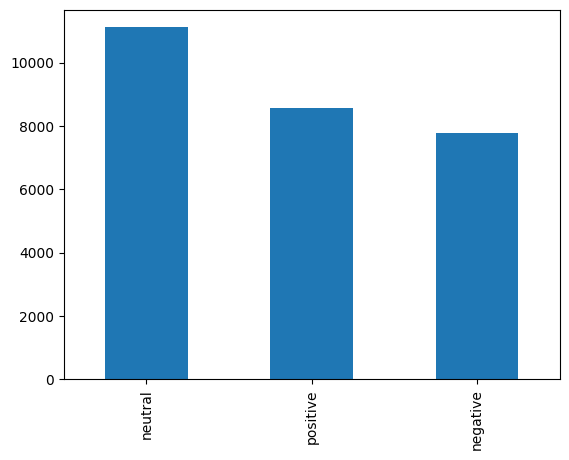

In [ ]:
df["sentiment"].value_counts().plot(kind='bar')

<Axes: ylabel='sentiment'>

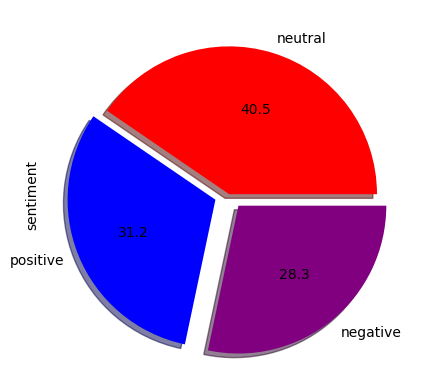

In [ ]:
 df["sentiment"].value_counts().plot(kind='pie',autopct='%0.1f',shadow=True,colors=['red','blue','purple'],explode=(0,0.1,0.1))

In [ ]:
# removing html tags
# extracting emojies
# to match and extract emojis from a given text
# removing special chars,punctuations and symbol
# lower casing
# removing stopwords
# tokenization


In [ ]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords_set=set(stopwords.words('english'))
emoji_pattern =re.compile('(?::|;|=)(?:=)?(?:\)]\(|D|P)')
def preprocessing(text):
  text=re.sub('<[^>]*>',"",text)
  emojis=emoji_pattern.findall(text)
  text=re.sub('[\W+]'," ",text.lower())+' '.join(emojis).replace('-',"")
  p=PorterStemmer()
  text=[p.stem(word) for word in text.split() if word not in stopwords_set]
  return " ".join(text)


In [ ]:
preprocessing(df['text'][2])

'boss bulli'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(df['text1'],df['sentiment'],train_size=0.5)


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.pipeline import Pipeline
accuracy_score(Pipeline((('lr',TfidfVectorizer()),('df',DecisionTreeClassifier()))).fit(xtr,ytr).predict(xtr),ytr)



0.9991994177583697

In [ ]:
df.dropna(inplace=True)

In [ ]:
len(xts)

13741

In [ ]:
accuracy_score(Pipeline((('lr',TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)),('df',DecisionTreeClassifier()))).fit(xtr,ytr).predict(xts),yts)

0.6495633187772926

16756    The most painful sound in the world to me is t...
4080      Please don`t vote for her out of sympathy!  #BGT
24616    Gah, I`m jittery and upset for absolutely NO r...
17159    god assignments are stressful ! but its finish...
20257    Burnt 3 of my fingers from trying to keep my h...
                               ...                        
6653     When I check google analytics I can always get...
10758    Just talked to `s cute grandma on the phone.  ...
19636    junk food and movies in a tshirt and sweats......
9824     skipping school w/ carleigh today, both of us ...
18626                                       Thx 4 sharing!
Name: text, Length: 13741, dtype: object

In [ ]:
df["text1"]=df.text.apply(lambda x:preprocessing(x))

In [ ]:
from collections import Counter


In [ ]:
p1=Counter(' '.join(df[df['sentiment']=='neutral']['text1']).split()).most_common(10)
p2=Counter(' '.join(df[df['sentiment']=='positive']['text1']).split()).most_common(10)
p3=Counter(' '.join(df[df['sentiment']=='negative']['text1']).split()).most_common(10)


In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'negative')

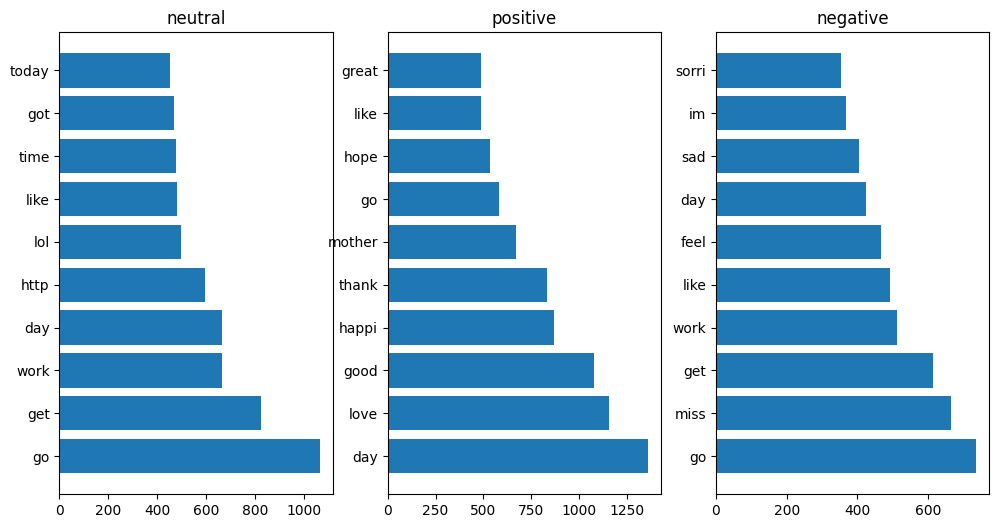

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(12,6))
axes[0].barh(range(len(p1)),[j for i,j in p1])
axes[0].set_yticks(range(len(p1)))
axes[0].set_yticklabels([i for i,j in p1])
axes[0].set_title("neutral")
axes[1].barh(range(len(p2)),[j for i,j in p2])
axes[1].set_yticks(range(len(p2)))
axes[1].set_yticklabels([i for i,j in p2])
axes[1].set_title("positive")
axes[2].barh(range(len(p3)),[j for i,j in p3])
axes[2].set_yticks(range(len(p3)))
axes[2].set_yticklabels([i for i,j in p3])
axes[2].set_title("negative")

NameError: ignored

In [ ]:
df

,textID,text,selected_text,sentiment,text1
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,respond go
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad miss san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,boss bulli
3,9642c003ef,what interview! leave me alone,leave me alone,negative,interview leav alon
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,son put releas alreadi bought
...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,wish could come see u denver husband lost job ...
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,wonder rake client made clear net forc dev lea...
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,yay good enjoy break probabl need hectic weeke...
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,worth


In [ ]:
def prediction(comment):
  clean_text=preprocessing(comment)
  commentlist=[preprocessed_comment]
  comment